In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

In [2]:
df = pd.read_csv("/datasets/gym_churn_us.csv")


In [3]:
# Mostrando as colunas
print(f"Dimensões: {df.shape}")
print(f"Colunas: {list(df.columns)}")


Dimensões: (4000, 14)
Colunas: ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn']


In [4]:
# Passo 2: Análise Exploratória dos Dados (EDA)
print("\n2. ANÁLISE EXPLORATÓRIA DOS DADOS")
print("\n2.1 Informações básicas do dataset:")
print(df.info())


2. ANÁLISE EXPLORATÓRIA DOS DADOS

2.1 Informações básicas do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null

In [5]:
print("\n2.2 Valores ausentes:")
print(df.isnull().sum())

print("\n2.3 Estatísticas descritivas:")
print(df.describe())

print("\n2.4 Distribuição da variável target (Churn):")
churn_counts = df['Churn'].value_counts()
churn_rate = df['Churn'].mean()
print(f"Não saíram (0): {churn_counts[0]} ({(1-churn_rate)*100:.1f}%)")
print(f"Saíram (1): {churn_counts[1]} ({churn_rate*100:.1f}%)")


2.2 Valores ausentes:
gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

2.3 Estatísticas descritivas:
            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000 

In [6]:
print("\n2.5 Comparação de médias entre grupos:")
comparison = df.groupby('Churn').mean()
print(comparison)


2.5 Comparação de médias entre grupos:
         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                 

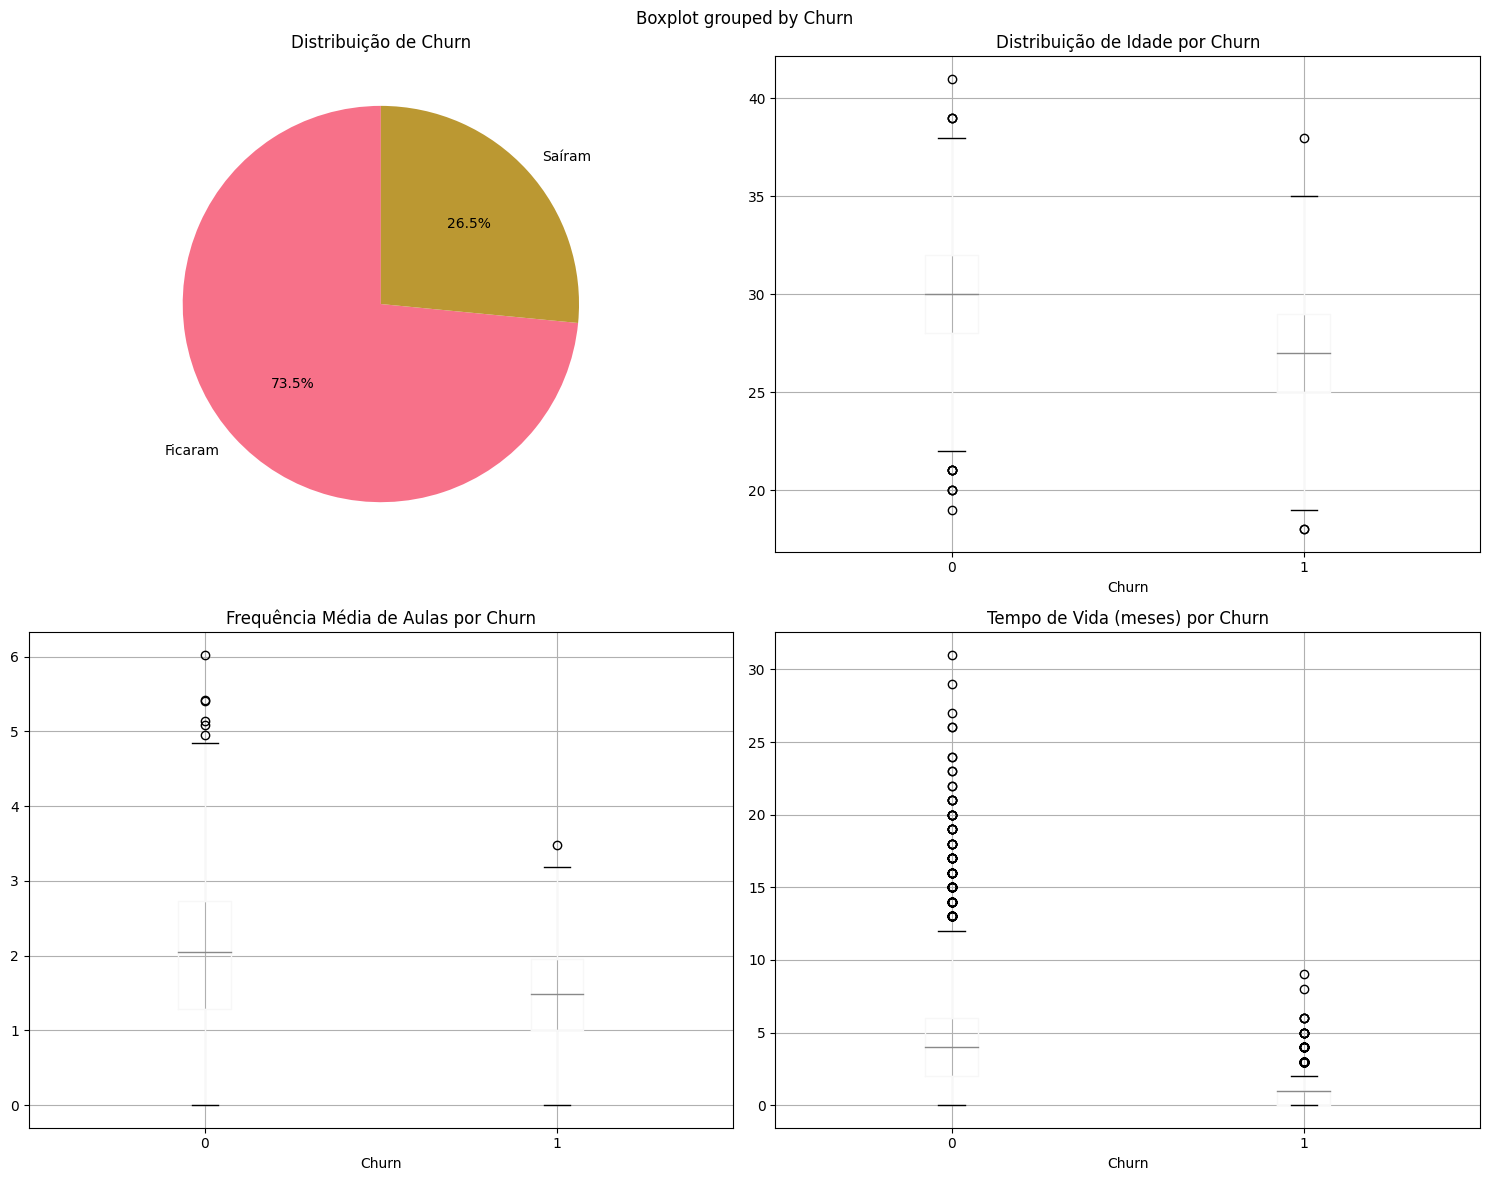

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribuição de churn
axes[0,0].pie(churn_counts.values, labels=['Ficaram', 'Saíram'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribuição de Churn')

# Idade por churn
df.boxplot(column='Age', by='Churn', ax=axes[0,1])
axes[0,1].set_title('Distribuição de Idade por Churn')
axes[0,1].set_xlabel('Churn')

# Frequência de aulas por churn
df.boxplot(column='Avg_class_frequency_total', by='Churn', ax=axes[1,0])
axes[1,0].set_title('Frequência Média de Aulas por Churn')
axes[1,0].set_xlabel('Churn')

# Tempo de vida por churn
df.boxplot(column='Lifetime', by='Churn', ax=axes[1,1])
axes[1,1].set_title('Tempo de Vida (meses) por Churn')
axes[1,1].set_xlabel('Churn')

plt.tight_layout()
plt.show()


2.6 Matriz de Correlação:


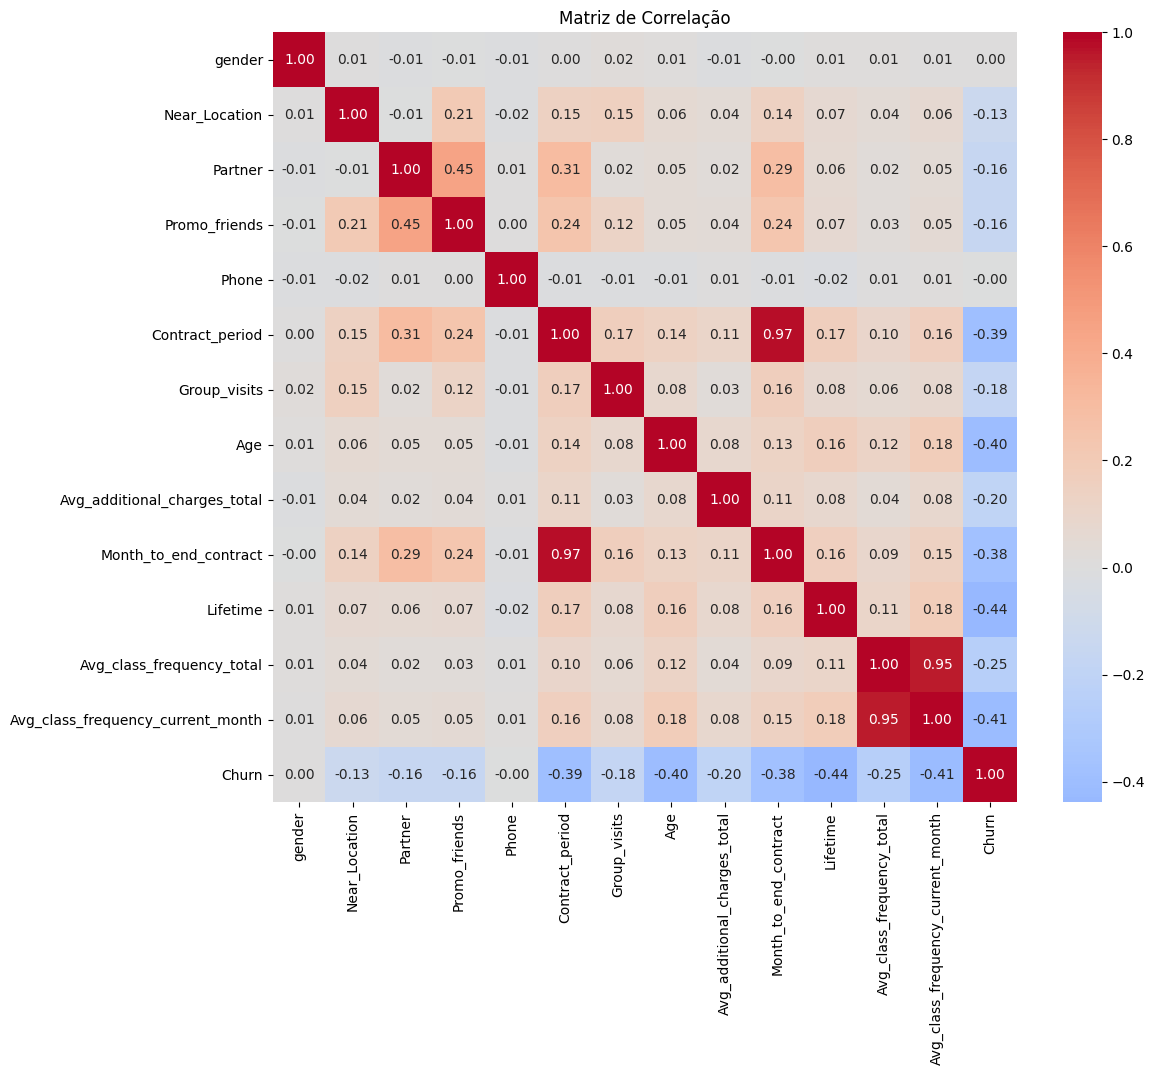

In [8]:
# Matriz de correlação
print("\n2.6 Matriz de Correlação:")
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

### Conclusão da análise das distribuições

A análise das distribuições mostra que há diferenças relevantes entre os clientes que permaneceram e os que saíram.  
- A distribuição geral de churn revela que uma parcela significativa de clientes deixou o serviço, destacando a importância de identificar os fatores associados a esse comportamento.  
- A variável **Idade** apresenta diferenças entre os grupos, indicando que a faixa etária pode influenciar na decisão de cancelamento.  
- A **frequência média de aulas** também varia entre os clientes que ficaram e os que saíram, sugerindo que o engajamento está diretamente relacionado à permanência.  

Esses achados indicam que variáveis como idade e frequência de uso têm impacto relevante no churn e devem ser consideradas na modelagem preditiva.


In [9]:
# Passo 3: Construir modelo para predizer churn
# Preparar dados
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dados de treino: {X_train.shape}")
print(f"Dados de teste: {X_test.shape}")

Dados de treino: (3200, 13)
Dados de teste: (800, 13)


In [10]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo com os dados normalizados
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Avaliação
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

print(f"Regressão Logística - Acurácia: {lr_accuracy:.3f}")
print(f"Regressão Logística - Precisão: {lr_precision:.3f}")
print(f"Regressão Logística - Recall: {lr_recall:.3f}")


Regressão Logística - Acurácia: 0.925
Regressão Logística - Precisão: 0.880
Regressão Logística - Recall: 0.830


In [11]:
# Modelo 2: Random Forest
print("\n3.2 Treinando Random Forest...")
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print(f"Random Forest - Acurácia: {rf_accuracy:.3f}")
print(f"Random Forest - Precisão: {rf_precision:.3f}")
print(f"Random Forest - Recall: {rf_recall:.3f}")


3.2 Treinando Random Forest...
Random Forest - Acurácia: 0.927
Random Forest - Precisão: 0.885
Random Forest - Recall: 0.835


In [12]:
# Comparação dos modelos
print("\n3.3 Comparação dos Modelos:")
models_comparison = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest'],
    'Acurácia': [lr_accuracy, rf_accuracy],
    'Precisão': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall]
})
print(models_comparison)


3.3 Comparação dos Modelos:
                Modelo  Acurácia  Precisão    Recall
0  Regressão Logística    0.9250     0.880  0.830189
1        Random Forest    0.9275     0.885  0.834906



3.4 Importância das Features (Random Forest):
                              Feature  Importance
10                           Lifetime    0.281499
12  Avg_class_frequency_current_month    0.161732
7                                 Age    0.133650
11          Avg_class_frequency_total    0.129011
8        Avg_additional_charges_total    0.089380
9               Month_to_end_contract    0.069467
5                     Contract_period    0.067036
6                        Group_visits    0.017554
0                              gender    0.011483
2                             Partner    0.011263
1                       Near_Location    0.010616
3                       Promo_friends    0.010262
4                               Phone    0.007046


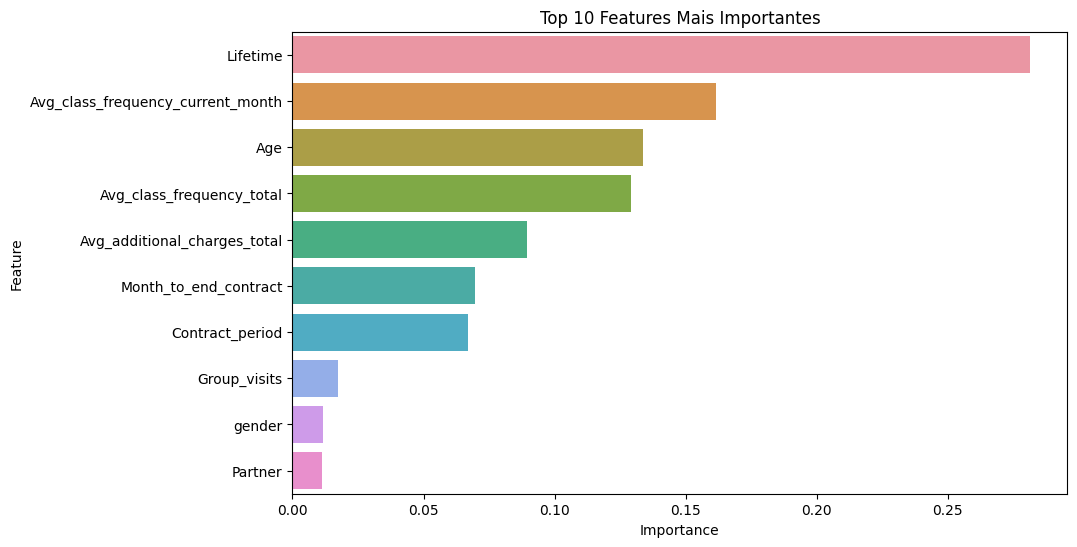

In [13]:
# Importância das features (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n3.4 Importância das Features (Random Forest):")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features Mais Importantes')
plt.show()



4.1 Construindo dendrograma...


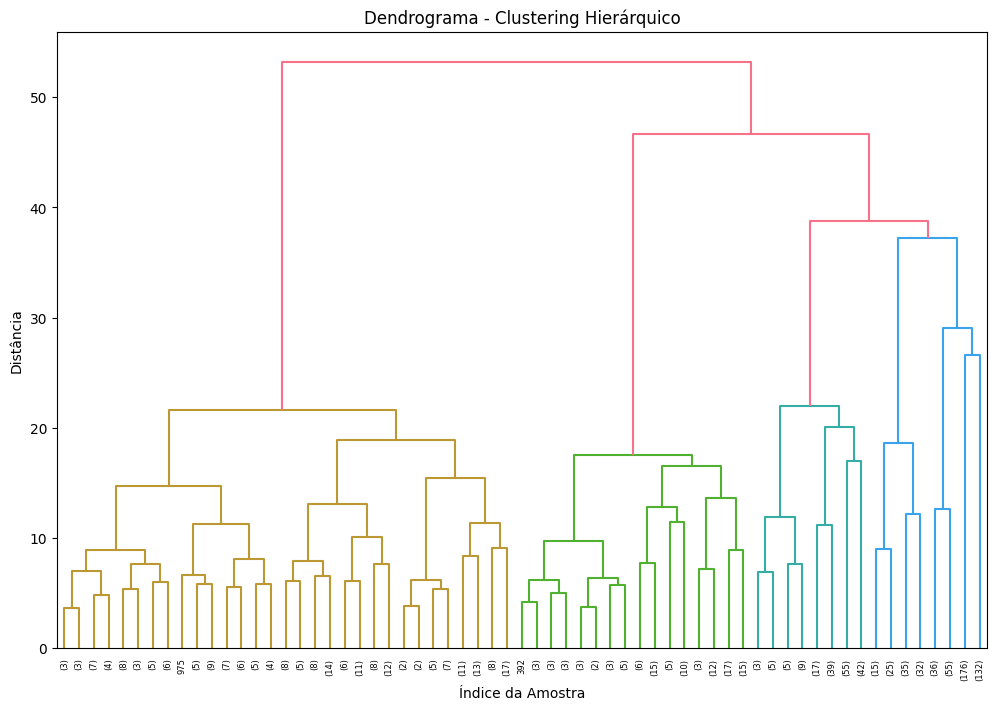

In [14]:
# Passo 4: Clustering de clientes


# Preparar dados para clustering (sem a variável target)
X_cluster = df.drop('Churn', axis=1)

# Padronizar dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

print("\n4.1 Construindo dendrograma...")
# Linkage para dendrograma
linkage_matrix = linkage(X_scaled[:1000], method='ward')  # Usando apenas 1000 amostras para velocidade

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrograma - Clustering Hierárquico')
plt.xlabel('Índice da Amostra')
plt.ylabel('Distância')
plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os dados foram padronizados
- O agrupamento hierárquico foi executado
- O dendograma foi criado
- A função `linkage()` foi utilizada para construir a matriz de distâncias
</div>

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar clusters ao dataframe
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = clusters

print("\n4.3 Características médias por cluster:")
cluster_summary = df_with_clusters.groupby('Cluster').mean()
print(cluster_summary)

print("\n4.4 Taxa de churn por cluster:")
churn_by_cluster = df_with_clusters.groupby('Cluster')['Churn'].agg(['count', 'sum', 'mean'])
churn_by_cluster.columns = ['Total_Clientes', 'Churned', 'Taxa_Churn']
churn_by_cluster['Taxa_Churn_Percent'] = churn_by_cluster['Taxa_Churn'] * 100
print(churn_by_cluster)





4.3 Características médias por cluster:
           gender  Near_Location   Partner  Promo_friends  Phone  \
Cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
Cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
Cluster                             

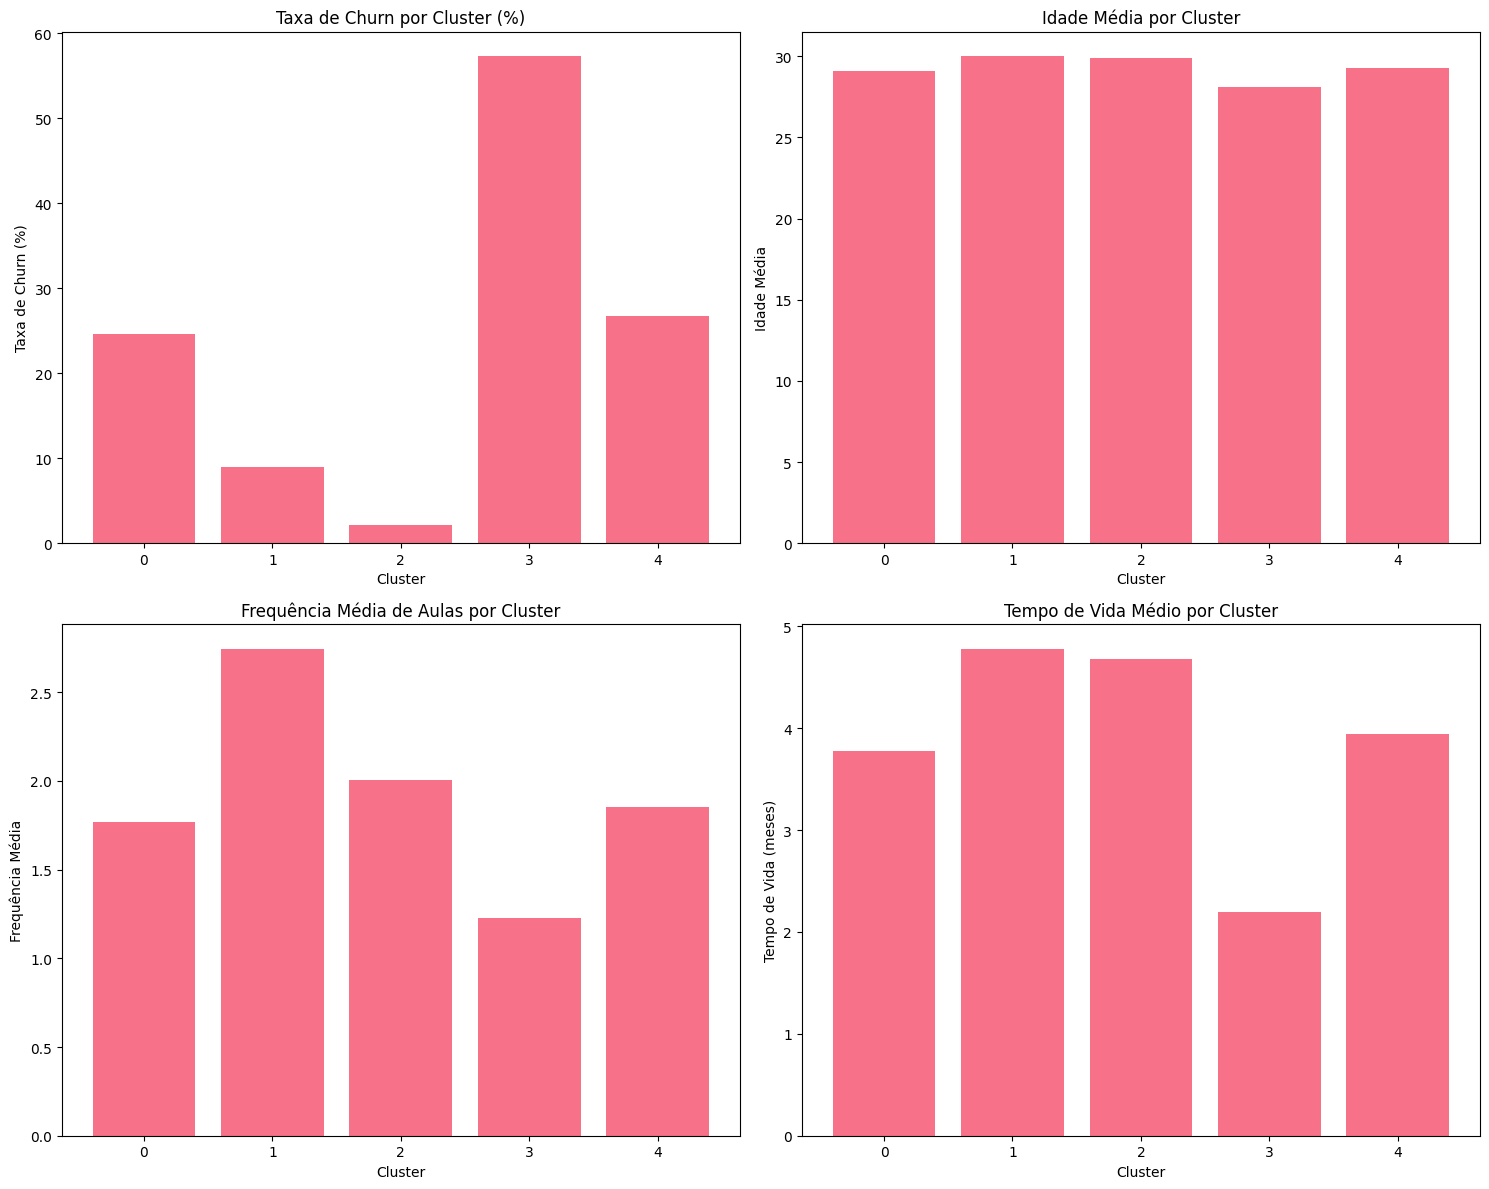

In [16]:
# Visualizar clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Taxa de churn por cluster
axes[0,0].bar(churn_by_cluster.index, churn_by_cluster['Taxa_Churn_Percent'])
axes[0,0].set_title('Taxa de Churn por Cluster (%)')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Taxa de Churn (%)')

# Idade média por cluster
cluster_age = df_with_clusters.groupby('Cluster')['Age'].mean()
axes[0,1].bar(cluster_age.index, cluster_age.values)
axes[0,1].set_title('Idade Média por Cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Idade Média')

# Frequência de aulas por cluster
cluster_freq = df_with_clusters.groupby('Cluster')['Avg_class_frequency_total'].mean()
axes[1,0].bar(cluster_freq.index, cluster_freq.values)
axes[1,0].set_title('Frequência Média de Aulas por Cluster')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Frequência Média')

# Tempo de vida por cluster
cluster_lifetime = df_with_clusters.groupby('Cluster')['Lifetime'].mean()
axes[1,1].bar(cluster_lifetime.index, cluster_lifetime.values)
axes[1,1].set_title('Tempo de Vida Médio por Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Tempo de Vida (meses)')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os grupos foram gerados utilizando K-means
- Os clusters foram analisados e as observações foram apresentadas
</div>

In [17]:
# Passo 5: Conclusões e Recomendações
print("\n5. CONCLUSÕES E RECOMENDAÇÕES")
print("\n=== PRINCIPAIS INSIGHTS ===")

print("\n1. PERFORMANCE DOS MODELOS:")
if rf_accuracy > lr_accuracy:
    print(f"   • Random Forest teve melhor performance (Acurácia: {rf_accuracy:.3f})")
else:
    print(f"   • Regressão Logística teve melhor performance (Acurácia: {lr_accuracy:.3f})")

print("\n2. FATORES MAIS IMPORTANTES PARA CHURN:")
top_features = feature_importance.head(5)
for idx, row in top_features.iterrows():
    print(f"   • {row['Feature']}: {row['Importance']:.3f}")

print("\n3. ANÁLISE DOS CLUSTERS:")
high_churn_clusters = churn_by_cluster[churn_by_cluster['Taxa_Churn'] > churn_rate]
low_churn_clusters = churn_by_cluster[churn_by_cluster['Taxa_Churn'] < churn_rate]

print(f"   • Clusters com ALTA taxa de churn: {list(high_churn_clusters.index)}")
print(f"   • Clusters com BAIXA taxa de churn: {list(low_churn_clusters.index)}")

print("\n=== RECOMENDAÇÕES ESTRATÉGICAS ===")
print("\n1. GRUPOS ALVO PRIORITÁRIOS:")
for cluster_id in high_churn_clusters.index:
    cluster_data = cluster_summary.loc[cluster_id]
    print(f"   • Cluster {cluster_id}: Taxa de churn {churn_by_cluster.loc[cluster_id, 'Taxa_Churn_Percent']:.1f}%")
    print(f"     - Idade média: {cluster_data['Age']:.1f} anos")
    print(f"     - Frequência de aulas: {cluster_data['Avg_class_frequency_total']:.2f}/semana")
    print(f"     - Tempo de vida: {cluster_data['Lifetime']:.1f} meses")

print("\n2. MEDIDAS PARA REDUZIR CHURN:")
print("   • Implementar programa de fidelidade para clientes com baixa frequência")
print("   • Criar campanhas de reengajamento para clientes com contratos próximos ao fim")
print("   • Desenvolver aulas especiais para diferentes faixas etárias")
print("   • Oferecer descontos progressivos baseados no tempo de vida do cliente")

print("\n3. ESTRATÉGIAS DE RETENÇÃO:")
print("   • Monitorar clientes que diminuem frequência de visitas")
print("   • Implementar sistema de alertas para contratos próximos ao vencimento")
print("   • Criar programas de referência para aumentar engajamento")
print("   • Personalizar ofertas baseadas no perfil do cluster do cliente")

print("\n=== ANÁLISE CONCLUÍDA ===")



5. CONCLUSÕES E RECOMENDAÇÕES

=== PRINCIPAIS INSIGHTS ===

1. PERFORMANCE DOS MODELOS:
   • Random Forest teve melhor performance (Acurácia: 0.927)

2. FATORES MAIS IMPORTANTES PARA CHURN:
   • Lifetime: 0.281
   • Avg_class_frequency_current_month: 0.162
   • Age: 0.134
   • Avg_class_frequency_total: 0.129
   • Avg_additional_charges_total: 0.089

3. ANÁLISE DOS CLUSTERS:
   • Clusters com ALTA taxa de churn: [3, 4]
   • Clusters com BAIXA taxa de churn: [0, 1, 2]

=== RECOMENDAÇÕES ESTRATÉGICAS ===

1. GRUPOS ALVO PRIORITÁRIOS:
   • Cluster 3: Taxa de churn 57.3%
     - Idade média: 28.1 anos
     - Frequência de aulas: 1.23/semana
     - Tempo de vida: 2.2 meses
   • Cluster 4: Taxa de churn 26.7%
     - Idade média: 29.3 anos
     - Frequência de aulas: 1.85/semana
     - Tempo de vida: 3.9 meses

2. MEDIDAS PARA REDUZIR CHURN:
   • Implementar programa de fidelidade para clientes com baixa frequência
   • Criar campanhas de reengajamento para clientes com contratos próximos ao 